<a href="https://colab.research.google.com/github/HiyaJain22/Projects/blob/main/spam_ham_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
# importing the Dataset

import pandas as pd

messages = pd.read_table('C:/Users/Yash Thakar/PROGRAMMING/spam_ham/SMSSpamCollection.txt', sep='\t',names=["label", "message"])

In [38]:
messages['message_len'] = messages.message.apply(len)
messages.head()

,label,message,message_len
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


Text(0.5, 0, 'Message Length')

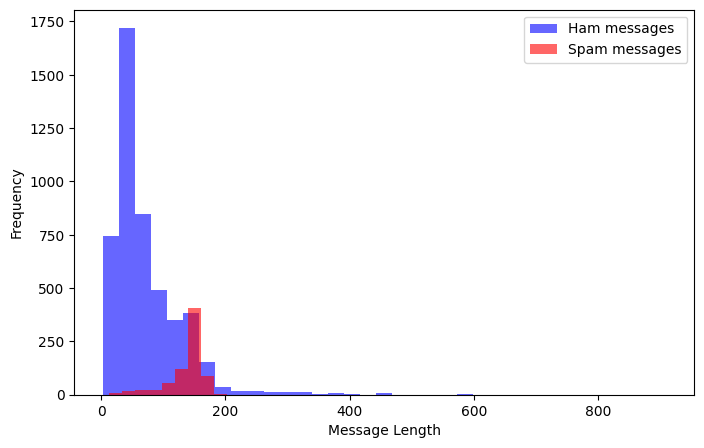

In [39]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))

messages[messages.label=='ham'].message_len.plot(bins=35, kind='hist', color='blue',
                                       label='Ham messages', alpha=0.6)
messages[messages.label=='spam'].message_len.plot(kind='hist', color='red',
                                       label='Spam messages', alpha=0.6)
plt.legend()
plt.xlabel("Message Length")

In [40]:
messages.shape

(5572, 3)

In [41]:
messages['message'].loc[100]

"Please don't text me anymore. I have nothing else to say."

In [42]:
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Yash
[nltk_data]     Thakar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [43]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [44]:
#Stemming
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['message'][i])
    review = review.lower()
    review = review.split()

    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [45]:
corpus

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl week word back like fun still tb ok xxx std chg send rcv',
 'even brother like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press copi friend callertun',
 'winner valu network custom select receivea prize reward claim call claim code kl valid hour',
 'mobil month u r entitl updat latest colour mobil camera free call mobil updat co free',
 'gonna home soon want talk stuff anymor tonight k cri enough today',
 'six chanc win cash pound txt csh send cost p day day tsandc appli repli hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw',
 'search right word thank breather

In [46]:
#BOW
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2500,binary=True)
X = cv.fit_transform(corpus).toarray()

In [47]:
import pickle
pickle.dump(X, open('cv.pkl', 'wb'))

In [48]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [49]:
y=pd.get_dummies(messages['label'])
y=y.iloc[:,1].values

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [51]:
X_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [52]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [53]:
y_train


array([False, False, False, ...,  True, False, False])

In [54]:
from sklearn.naive_bayes import MultinomialNB

In [55]:
spam_detect_model=MultinomialNB().fit(X_train,y_train)

In [56]:
y_pred=spam_detect_model.predict(X_test)

In [57]:
from sklearn.metrics import accuracy_score,classification_report

In [58]:
score=accuracy_score(y_test,y_pred)

In [59]:
score

0.9856502242152466

In [60]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

       False       0.99      0.99      0.99       961
        True       0.93      0.97      0.95       154

    accuracy                           0.99      1115
   macro avg       0.96      0.98      0.97      1115
weighted avg       0.99      0.99      0.99      1115



In [61]:
# Creating the TFIDF model
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer(max_features=2500)
X = tv.fit_transform(corpus).toarray()

In [62]:
# Train Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)


In [63]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(X_train, y_train)

In [64]:
y_pred=spam_detect_model.predict(X_test)
score=accuracy_score(y_test,y_pred)
print(score)

0.979372197309417


In [65]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

       False       1.00      0.98      0.99       978
        True       0.86      1.00      0.92       137

    accuracy                           0.98      1115
   macro avg       0.93      0.99      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [70]:
user_input = input("Enter a message: ")

# Preprocess the user input by transforming it into the same format as the training data
user_input_features = cv.transform([user_input])

# Predict the label for the user input
prediction = spam_detect_model.predict(user_input_features)
print(prediction)
# Print the prediction
if prediction[0] == True:
    print("The message is classified as spam.")
else:
    print("The message is classified as ham (non-spam).")

Enter a message: Urgent UR awarded a complimentary trip to EuroDisinc Trav, Aco&Entry41 Or £1000. To claim txt DIS to 87121 18+6*£1.50(moreFrmMob. ShrAcomOrSglSuplt)10, LS1 3AJ
[False]
The message is classified as ham (non-spam).


In [32]:
import pickle
pickle.dump(spam_detect_model, open('model.pkl', 'wb'))